# Problem Statement
### y -> Whether the client has subscribed a term deposit or not 

In [60]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression

In [61]:
#load the data set
bank=pd.read_csv('C:/Users/hp/Desktop/DATA SCIENCE COURSE/ASSIGNMENT/ASSIGNMENT 6/bank-full-final.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [62]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [63]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [64]:
bank['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [65]:
# handling categorical feature: job

from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
bank['job']= label_encoder.fit_transform(bank['job'])
 
bank['job'].unique()

array([ 4,  9,  2,  1, 11,  5,  0,  7,  6, 10,  3,  8])

In [66]:
bank['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [67]:
marital=pd.get_dummies(bank['marital'],drop_first=True)
marital

,married,single
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
45206,1,0
45207,0,0
45208,1,0
45209,1,0


In [68]:
bank=pd.concat([bank,marital],axis=1,)
bank.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,married,single
0,58,4,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1,0
1,44,9,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0,1
2,33,2,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1,0
3,47,1,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,1,0
4,33,11,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0,1


In [69]:
bank.drop('marital',axis=1,inplace=True)


In [70]:
bank.head()

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,married,single
0,58,4,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1,0
1,44,9,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0,1
2,33,2,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1,0
3,47,1,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,1,0
4,33,11,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0,1


In [71]:
# handling categorical feature: education
bank['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [72]:
bank['education']=bank['education'].map({'unknown':0,'primary':1,'secondary':2,'tertiary':3,})

In [73]:
bank

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,married,single
0,58,4,3,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1,0
1,44,9,2,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0,1
2,33,2,2,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1,0
3,47,1,0,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,1,0
4,33,11,0,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,3,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,1,0
45207,71,5,1,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,0,0
45208,72,5,2,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,1,0
45209,57,1,2,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,1,0


In [74]:
# handling categorical feature: default
bank['default'].unique()


array(['no', 'yes'], dtype=object)

In [75]:
bank['default']=bank['default'].map({'no':0,'yes':1})

In [76]:
bank.head()

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,married,single
0,58,4,3,0,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1,0
1,44,9,2,0,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0,1
2,33,2,2,0,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1,0
3,47,1,0,0,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,1,0
4,33,11,0,0,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0,1


In [77]:
# handling categorical feature: housing
bank['housing']=bank['housing'].map({'no':0,'yes':1})

In [78]:
bank.head()

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,married,single
0,58,4,3,0,2143,1,no,unknown,5,may,261,1,-1,0,unknown,no,1,0
1,44,9,2,0,29,1,no,unknown,5,may,151,1,-1,0,unknown,no,0,1
2,33,2,2,0,2,1,yes,unknown,5,may,76,1,-1,0,unknown,no,1,0
3,47,1,0,0,1506,1,no,unknown,5,may,92,1,-1,0,unknown,no,1,0
4,33,11,0,0,1,0,no,unknown,5,may,198,1,-1,0,unknown,no,0,1


In [79]:
# handling categorical feature: loan
bank['loan']=bank['loan'].map({'no':0,'yes':1})

In [80]:
bank.head()

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,married,single
0,58,4,3,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,no,1,0
1,44,9,2,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,no,0,1
2,33,2,2,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,no,1,0
3,47,1,0,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,no,1,0
4,33,11,0,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,no,0,1


In [81]:
bank['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [82]:
# handling categorical feature: contact
bank['contact']=bank['contact'].map({'unknown':0,'cellular':1,'telephone':2})
bank.head()

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,married,single
0,58,4,3,0,2143,1,0,0,5,may,261,1,-1,0,unknown,no,1,0
1,44,9,2,0,29,1,0,0,5,may,151,1,-1,0,unknown,no,0,1
2,33,2,2,0,2,1,1,0,5,may,76,1,-1,0,unknown,no,1,0
3,47,1,0,0,1506,1,0,0,5,may,92,1,-1,0,unknown,no,1,0
4,33,11,0,0,1,0,0,0,5,may,198,1,-1,0,unknown,no,0,1


In [83]:
bank['day'].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31],
      dtype=int64)

In [84]:
bank['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [85]:
# handling categorical feature: month
bank['month']=bank['month'].map({'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12, 'jan':1, 'feb':2,
       'mar':3, 'apr':4, 'sep':9})
bank.head()

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,married,single
0,58,4,3,0,2143,1,0,0,5,5,261,1,-1,0,unknown,no,1,0
1,44,9,2,0,29,1,0,0,5,5,151,1,-1,0,unknown,no,0,1
2,33,2,2,0,2,1,1,0,5,5,76,1,-1,0,unknown,no,1,0
3,47,1,0,0,1506,1,0,0,5,5,92,1,-1,0,unknown,no,1,0
4,33,11,0,0,1,0,0,0,5,5,198,1,-1,0,unknown,no,0,1


In [86]:
bank['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [88]:
# handling categorical feature: poutcome
poutcome=pd.get_dummies(bank['poutcome'],drop_first=True)

In [92]:
bank=pd.concat([bank,poutcome],axis=1)


In [94]:
bank.drop('poutcome',axis=1,inplace=True)
bank

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y,married,single,other,success,unknown
0,58,4,3,0,2143,1,0,0,5,5,261,1,-1,0,no,1,0,0,0,1
1,44,9,2,0,29,1,0,0,5,5,151,1,-1,0,no,0,1,0,0,1
2,33,2,2,0,2,1,1,0,5,5,76,1,-1,0,no,1,0,0,0,1
3,47,1,0,0,1506,1,0,0,5,5,92,1,-1,0,no,1,0,0,0,1
4,33,11,0,0,1,0,0,0,5,5,198,1,-1,0,no,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,3,0,825,0,0,1,17,11,977,3,-1,0,yes,1,0,0,0,1
45207,71,5,1,0,1729,0,0,1,17,11,456,2,-1,0,yes,0,0,0,0,1
45208,72,5,2,0,5715,0,0,1,17,11,1127,5,184,3,yes,1,0,0,1,0
45209,57,1,2,0,668,0,0,2,17,11,508,4,-1,0,no,1,0,0,0,1


In [96]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  int32 
 2   education  45211 non-null  int64 
 3   default    45211 non-null  int64 
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  int64 
 6   loan       45211 non-null  int64 
 7   contact    45211 non-null  int64 
 8   day        45211 non-null  int64 
 9   month      45211 non-null  int64 
 10  duration   45211 non-null  int64 
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  y          45211 non-null  object
 15  married    45211 non-null  uint8 
 16  single     45211 non-null  uint8 
 17  other      45211 non-null  uint8 
 18  success    45211 non-null  uint8 
 19  unknown    45211 non-null  uint8 
dtypes: int32(1), int64(13), obje

In [97]:
# handling categorical feature: y
bank['y']=bank['y'].map({'no':0,'yes':1})
bank.head()

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y,married,single,other,success,unknown
0,58,4,3,0,2143,1,0,0,5,5,261,1,-1,0,0,1,0,0,0,1
1,44,9,2,0,29,1,0,0,5,5,151,1,-1,0,0,0,1,0,0,1
2,33,2,2,0,2,1,1,0,5,5,76,1,-1,0,0,1,0,0,0,1
3,47,1,0,0,1506,1,0,0,5,5,92,1,-1,0,0,1,0,0,0,1
4,33,11,0,0,1,0,0,0,5,5,198,1,-1,0,0,0,1,0,0,1


<AxesSubplot:xlabel='education'>

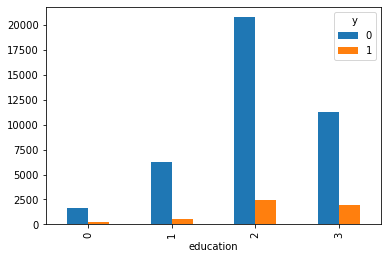

In [208]:
# bar plot between 2 different categories 
pd.crosstab(bank['education'],bank['y']).plot(kind="bar")

<AxesSubplot:xlabel='education', ylabel='y'>

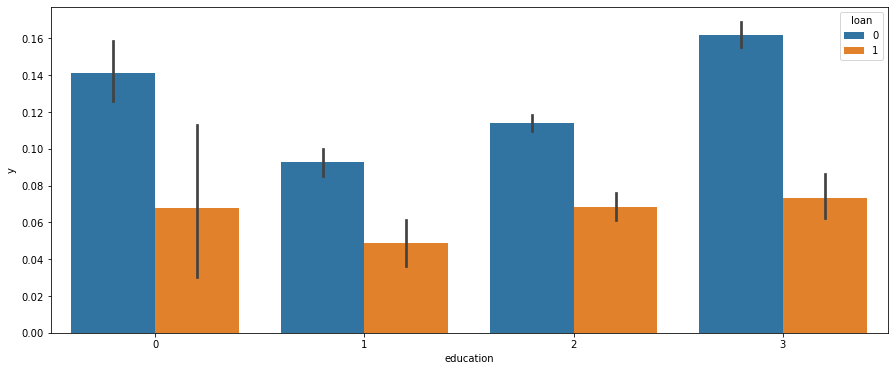

In [180]:
plt.figure(figsize=(15,6))
sns.barplot(x='education',y="y",hue='loan',data=bank)

<AxesSubplot:xlabel='job'>

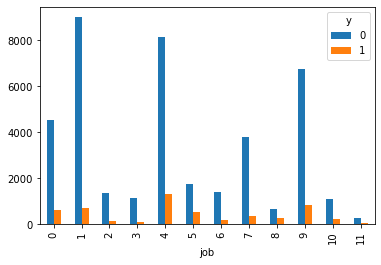

In [170]:
pd.crosstab(bank['job'],bank['y']).plot(kind="bar")

<AxesSubplot:xlabel='loan'>

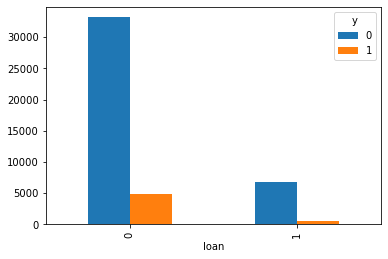

In [175]:
pd.crosstab(bank['loan'],bank['y']).plot(kind="bar")

In [182]:
bank.head()


,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y,married,single,other,success,unknown
0,58,4,3,0,2143,1,0,0,5,5,261,1,-1,0,0,1,0,0,0,1
1,44,9,2,0,29,1,0,0,5,5,151,1,-1,0,0,0,1,0,0,1
2,33,2,2,0,2,1,1,0,5,5,76,1,-1,0,0,1,0,0,0,1
3,47,1,0,0,1506,1,0,0,5,5,92,1,-1,0,0,1,0,0,0,1
4,33,11,0,0,1,0,0,0,5,5,198,1,-1,0,0,0,1,0,0,1


In [186]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int32
 2   education  45211 non-null  int64
 3   default    45211 non-null  int64
 4   balance    45211 non-null  int64
 5   housing    45211 non-null  int64
 6   loan       45211 non-null  int64
 7   contact    45211 non-null  int64
 8   day        45211 non-null  int64
 9   month      45211 non-null  int64
 10  duration   45211 non-null  int64
 11  campaign   45211 non-null  int64
 12  pdays      45211 non-null  int64
 13  previous   45211 non-null  int64
 14  y          45211 non-null  int64
 15  married    45211 non-null  uint8
 16  single     45211 non-null  uint8
 17  other      45211 non-null  uint8
 18  success    45211 non-null  uint8
 19  unknown    45211 non-null  uint8
dtypes: int32(1), int64(14), uint8(5)
memory usage: 5.2

In [196]:
#dividing data into output variable
x=pd.concat([bank.iloc[:,0:14],bank.iloc[:,15:]],axis=1)
y=pd.concat([bank.iloc[:,14]])

In [189]:
x


,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,married,single,other,success,unknown
0,58,4,3,0,2143,1,0,0,5,5,261,1,-1,0,1,0,0,0,1
1,44,9,2,0,29,1,0,0,5,5,151,1,-1,0,0,1,0,0,1
2,33,2,2,0,2,1,1,0,5,5,76,1,-1,0,1,0,0,0,1
3,47,1,0,0,1506,1,0,0,5,5,92,1,-1,0,1,0,0,0,1
4,33,11,0,0,1,0,0,0,5,5,198,1,-1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,3,0,825,0,0,1,17,11,977,3,-1,0,1,0,0,0,1
45207,71,5,1,0,1729,0,0,1,17,11,456,2,-1,0,0,0,0,0,1
45208,72,5,2,0,5715,0,0,1,17,11,1127,5,184,3,1,0,0,1,0
45209,57,1,2,0,668,0,0,2,17,11,508,4,-1,0,1,0,0,0,1


In [197]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

#  model prediction


In [198]:
# Model Predictions
classifier=LogisticRegression()
classifier.fit(x,y)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [199]:
y_predict=classifier.predict(x)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [200]:
new_data=pd.DataFrame({'y_actual':y,'y_predicted':y_predict})

In [201]:
new_data

,y_actual,y_predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


# Testing Model Accuracy

In [202]:
# confusion matrix for model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y,y_predict)
confusion_matrix

array([[39172,   750],
       [ 4370,   919]], dtype=int64)

In [203]:
model_accuracy=(39172+919)/(39172+750+4370+919)*100
model_accuracy

88.67532237729756

In [204]:
from sklearn.metrics import classification_report
print(classification_report(y,y_predict))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.55      0.17      0.26      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.58      0.60     45211
weighted avg       0.86      0.89      0.86     45211



Text(0, 0.5, 'True Positive Rate')

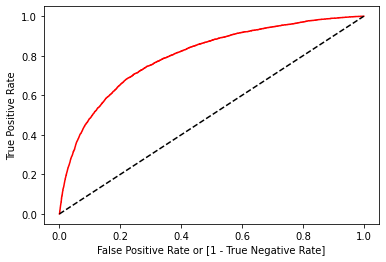

In [205]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba (x)[:,1])

auc = roc_auc_score(y, y_predict)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
